In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Dataset/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [5]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [6]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [7]:
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [8]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)

#Type of Contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

#Duration of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

#Number of Followup as it is Discrete feature
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

#Preferred Property Star
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#Number of Trips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#Number of Children Visiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#Monthly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [10]:
df.drop('CustomerID', inplace=True, axis=1)

In [11]:
#Create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1,inplace=True)

In [12]:
#Get all numeric feature
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Feature: ',len(num_features))

#Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
print('Num of Categorical Feature: ',len(cat_features))

#Discrete Features
dis_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Feature: ',len(dis_features))

#Continuous Features
cont_features = [feature for feature in num_features if feature not in dis_features]
print('Num of Continuous Feature: ',len(cont_features))

Num of Numerical Feature:  12
Num of Categorical Feature:  6
Num of Discrete Feature:  9
Num of Continuous Feature:  3


In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [15]:
#Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [16]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  #Make Predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Training set performance
  model_train_accuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred)
  model_train_rocauc = roc_auc_score(y_train,y_train_pred)

  #Test set performance
  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred)
  model_test_rocauc = roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model Performance for Training Set')

  print('- Accuracy: {:.4f}'.format(model_train_accuracy))
  print('- F1: {:.4f}'.format(model_train_f1))
  print('- Precision: {:.4f}'.format(model_train_precision))
  print('- Recall: {:.4f}'.format(model_train_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc))

  print('-----------------------------------')

  print('Model Performance for Test Set')

  print('- Accuracy: {:.4f}'.format(model_test_accuracy))
  print('- F1: {:.4f}'.format(model_test_f1))
  print('- Precision: {:.4f}'.format(model_test_precision))
  print('- Recall: {:.4f}'.format(model_test_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc))

  print('='*35)

Logistic Regression
Model Performance for Training Set
- Accuracy: 0.8460
- F1: 0.8202
- Precision: 0.7016
- Recall: 0.3032
- ROC AUC Score: 0.6368
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.8364
- F1: 0.8087
- Precision: 0.6914
- Recall: 0.2932
- ROC AUC Score: 0.6307
Decision Tree
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.9131
- F1: 0.9125
- Precision: 0.7880
- Recall: 0.7592
- ROC AUC Score: 0.8548
Random Forest
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.9243
- F1: 0.9177
- Precision: 0.9756
- Recall: 0.6283
- ROC AUC Score: 0.8122
Gradient Boost
Model Performance for Training Set
- Accuracy: 0.8939
- F1: 0.8819
- Prec

In [21]:
#Hyperparameter Tuning
grad_param = {'loss':['log_loss','deviance','exponential'],
               'criterion':['friedman_mse','squared_error','mse'],
               'min_samples_split':[2,8,15,20],
               'n_estimators':[100,200,500,1000],
               'max_depth':[5,8,15,None,10]}

In [22]:
#Models list for Hyperparameter Tuning
randomcv_models = [
                    ('Gradient Boost',GradientBoostingClassifier(),grad_param)
                  ]

In [24]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name,model,params in randomcv_models:
  rv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
  rv.fit(X_train,y_train)
  model_params[name] = rv.best_params_

for model_name in model_params:
  print(f'---------- Best Params for {model_name} ----------')
  print(model_params[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------- Best Params for Gradient Boost ----------
{'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 10, 'loss': 'log_loss', 'criterion': 'friedman_mse'}


In [25]:
models = {
    'Gradient Boost': GradientBoostingClassifier(n_estimators=500,criterion='friedman_mse',loss='log_loss',max_depth=10,min_samples_split=15)
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  #Make Predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Training set performance
  model_train_accuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred)
  model_train_rocauc = roc_auc_score(y_train,y_train_pred)

  #Test set performance
  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred)
  model_test_rocauc = roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])

  print('Model Performance for Training Set')

  print('- Accuracy: {:.4f}'.format(model_train_accuracy))
  print('- F1: {:.4f}'.format(model_train_f1))
  print('- Precision: {:.4f}'.format(model_train_precision))
  print('- Recall: {:.4f}'.format(model_train_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc))

  print('-----------------------------------')

  print('Model Performance for Test Set')

  print('- Accuracy: {:.4f}'.format(model_test_accuracy))
  print('- F1: {:.4f}'.format(model_test_f1))
  print('- Precision: {:.4f}'.format(model_test_precision))
  print('- Recall: {:.4f}'.format(model_test_recall))
  print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc))

  print('='*35)

Gradient Boost
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
-----------------------------------
Model Performance for Test Set
- Accuracy: 0.9622
- F1: 0.9610
- Precision: 0.9753
- Recall: 0.8272
- ROC AUC Score: 0.9111


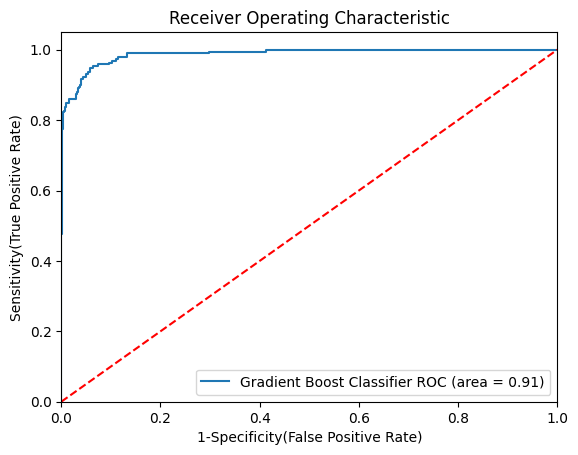

In [26]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Gradient Boost Classifier',
    'model': GradientBoostingClassifier(n_estimators=500,criterion='friedman_mse',loss='log_loss',max_depth=10,min_samples_split=15),
    'auc':  0.9111
}

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()